In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

30315


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,各地の直近1週間の人口10万人あたりの感染者数
30310,2021-10-17,47,沖縄県,7,50043,0,362,11.29
30311,2021-10-18,47,沖縄県,16,50059,3,365,11.91
30312,2021-10-19,47,沖縄県,29,50088,0,365,11.91
30313,2021-10-20,47,沖縄県,20,50108,0,365,11.08
30314,2021-10-21,47,沖縄県,18,50126,3,368,10.05


In [3]:
latest_date = pref["日付"].max().strftime("%Y-%m-%d")

In [4]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp = all_jp.rename(columns={"各地の死者数_1日ごとの発表数":"各地の死者数合計"})
all_jp.tail()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,各地の直近1週間の人口10万人あたりの感染者数
42,静岡県,14190,26734,209,5132.83
43,香川県,23865,4696,38,3437.04
44,高知県,25155,4151,32,4152.00
45,鳥取県,19995,1662,5,2090.87
46,鹿児島県,29670,9097,65,3974.46


## 都道府県ごとの最新データを付与

In [5]:
# 直近１週間の感染者数
pref["直近1週間の感染者数"] = pref["各地の感染者数_1日ごとの発表数"].rolling(7).sum()
pref.tail(7)

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,各地の直近1週間の人口10万人あたりの感染者数,直近1週間の感染者数
30308,2021-10-15,47,沖縄県,31,50011,6,362,11.08,161.0
30309,2021-10-16,47,沖縄県,25,50036,0,362,11.77,171.0
30310,2021-10-17,47,沖縄県,7,50043,0,362,11.29,164.0
30311,2021-10-18,47,沖縄県,16,50059,3,365,11.91,173.0
30312,2021-10-19,47,沖縄県,29,50088,0,365,11.91,173.0
30313,2021-10-20,47,沖縄県,20,50108,0,365,11.08,161.0
30314,2021-10-21,47,沖縄県,18,50126,3,368,10.05,146.0


### 感染者数前日比

In [6]:
import numpy as np
pref["新規感染者数前日比"] = pref["各地の感染者数_1日ごとの発表数"].pct_change()
# 一番古い日付だけNANを設定
pref.loc[pref["日付"]==pref["日付"].min(),"新規感染者数前日比"] = np.nan
pref["直近1週間の新規感染者数前日比平均"] = pref["新規感染者数前日比"].rolling(7).mean()
pref["新規感染者数先週比"] = pref["各地の感染者数_1日ごとの発表数"].pct_change(periods=7)

pref.tail(10)

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,各地の直近1週間の人口10万人あたりの感染者数,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,新規感染者数先週比
30305,2021-10-12,47,沖縄県,29,49915,0,345,9.64,140.0,3.142857,0.318391,-0.236842
30306,2021-10-13,47,沖縄県,32,49947,5,350,9.77,142.0,0.103448,0.363245,0.066667
30307,2021-10-14,47,沖縄県,33,49980,6,356,10.94,159.0,0.031250,0.434376,1.062500
30308,2021-10-15,47,沖縄県,31,50011,6,362,11.08,161.0,-0.060606,0.309646,0.068966
30309,2021-10-16,47,沖縄県,25,50036,0,362,11.77,171.0,-0.193548,0.350962,0.666667
30310,2021-10-17,47,沖縄県,7,50043,0,362,11.29,164.0,-0.720000,0.257629,-0.500000
30311,2021-10-18,47,沖縄県,16,50059,3,365,11.91,173.0,1.285714,0.512731,1.285714
30312,2021-10-19,47,沖縄県,29,50088,0,365,11.91,173.0,0.812500,0.179823,0.000000
30313,2021-10-20,47,沖縄県,20,50108,0,365,11.08,161.0,-0.310345,0.120709,-0.375000
30314,2021-10-21,47,沖縄県,18,50126,3,368,10.05,146.0,-0.100000,0.101959,-0.454545


In [7]:
latest = pref.loc[pref["日付"]==pref["日付"].max()][["日付","都道府県名","各地の感染者数_1日ごとの発表数","各地の死者数_1日ごとの発表数","直近1週間の感染者数","新規感染者数前日比","直近1週間の新規感染者数前日比平均","新規感染者数先週比"]]
latest.head()

,日付,都道府県名,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,新規感染者数先週比
644,2021-10-21,北海道,11,0,137.0,-0.214286,-0.085002,-0.755556
1289,2021-10-21,青森県,5,0,35.0,4.000000,NaN,-0.375000
1934,2021-10-21,岩手県,0,0,0.0,NaN,NaN,NaN
2579,2021-10-21,宮城県,0,0,5.0,NaN,NaN,-1.000000
3224,2021-10-21,秋田県,1,0,3.0,0.000000,NaN,inf


In [8]:
all_jp = pd.merge(all_jp, latest, on="都道府県名")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,各地の直近1週間の人口10万人あたりの感染者数,日付,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,新規感染者数先週比
0,三重県,15480,14754,163,5794.85,2021-10-21,6,0,29.0,0.500000,NaN,0.200000
1,京都府,16770,35815,290,9701.42,2021-10-21,4,0,49.0,-0.500000,0.182801,-0.555556
2,佐賀県,26445,5825,30,4993.91,2021-10-21,2,0,20.0,-0.600000,NaN,inf
3,兵庫県,18060,78247,1394,10011.20,2021-10-21,29,0,164.0,0.160000,0.390682,-0.033333
4,北海道,645,60656,1469,8081.51,2021-10-21,11,0,137.0,-0.214286,-0.085002,-0.755556


## 人口データを付与

In [9]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)

In [10]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,各地の直近1週間の人口10万人あたりの感染者数,日付,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,新規感染者数先週比,人口
0,三重県,15480,14754,163,5794.85,2021-10-21,6,0,29.0,0.500000,NaN,0.200000,1813859
1,京都府,16770,35815,290,9701.42,2021-10-21,4,0,49.0,-0.500000,0.182801,-0.555556,2545899
2,佐賀県,26445,5825,30,4993.91,2021-10-21,2,0,20.0,-0.600000,NaN,inf,823810
3,兵庫県,18060,78247,1394,10011.20,2021-10-21,29,0,164.0,0.160000,0.390682,-0.033333,5549568
4,北海道,645,60656,1469,8081.51,2021-10-21,11,0,137.0,-0.214286,-0.085002,-0.755556,5267762


## 人口当たりの感染者数

In [11]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)
all_jp["10万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 100000)
all_jp["直近1週間の10万人当たりの感染者数"] = all_jp["直近1週間の感染者数"] / (all_jp["人口"] / 100000)
all_jp.sort_values("都道府県コード")

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,各地の直近1週間の人口10万人あたりの感染者数,日付,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,新規感染者数先週比,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
4,北海道,645,60656,1469,8081.51,2021-10-21,11,0,137.0,-0.214286,-0.085002,-0.755556,5267762,115.145673,1151.456729,2.600725
41,青森県,1290,5882,38,3299.30,2021-10-21,5,0,35.0,4.000000,NaN,-0.375000,1275783,46.105019,461.050194,2.743413
19,岩手県,1935,3486,53,1988.42,2021-10-21,0,0,0.0,NaN,NaN,NaN,1235517,28.214909,282.149092,0.000000
11,宮城県,2580,16253,118,4933.26,2021-10-21,0,0,5.0,NaN,NaN,-1.000000,2292385,70.899958,708.999579,0.218113
36,秋田県,3225,1896,27,1372.62,2021-10-21,1,0,3.0,0.000000,NaN,inf,985416,19.240605,192.406050,0.304440
15,山形県,3870,3542,56,2295.49,2021-10-21,0,0,18.0,-1.000000,NaN,-1.000000,1082296,32.726722,327.267217,1.663131
35,福島県,4515,9479,175,3593.80,2021-10-21,0,0,9.0,NaN,NaN,-1.000000,1881981,50.367140,503.671397,0.478219
38,茨城県,5160,24376,218,5962.00,2021-10-21,6,0,39.0,-0.142857,0.654195,0.200000,2921436,83.438419,834.384186,1.334960
27,栃木県,5805,15433,116,5581.76,2021-10-21,3,0,29.0,-0.400000,0.563265,-0.400000,1965516,78.518822,785.188215,1.475440
37,群馬県,6450,16714,176,6019.56,2021-10-21,4,0,33.0,-0.333333,0.797619,1.000000,1969439,84.866807,848.668072,1.675604


## 感染者数

### 平均値、中央値

In [12]:
all_jp["各地の感染者数合計"].describe()

count        47.000000
mean      36408.744681
std       67243.185127
min        1662.000000
25%        5308.000000
50%        9479.000000
75%       25555.000000
max      377341.000000
Name: 各地の感染者数合計, dtype: float64

### TOP 10

In [13]:
all_jp.sort_values("各地の感染者数合計", ascending=False).reset_index(drop=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,各地の直近1週間の人口10万人あたりの感染者数,日付,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,新規感染者数先週比,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
0,東京都,8385,377341,3115,18968.44,2021-10-21,36,2,305.0,-0.121951,-0.047625,-0.419355,13834925,272.745244,2727.452444,2.204566
1,大阪府,17415,201982,3037,16035.98,2021-10-21,42,6,441.0,-0.424658,0.059428,-0.625000,8849635,228.237662,2282.376618,4.983256
2,神奈川県,9030,168778,1302,12838.76,2021-10-21,39,2,193.0,1.437500,0.120896,-0.250000,9209442,183.266261,1832.662609,2.095675
3,埼玉県,7095,115489,1029,10994.87,2021-10-21,11,1,121.0,-0.083333,-0.139097,-0.685714,7390054,156.276260,1562.762600,1.637336
4,愛知県,14835,106427,1155,9859.01,2021-10-21,22,0,169.0,-0.153846,0.039099,-0.352941,7575530,140.487860,1404.878603,2.230867
5,千葉県,7740,100221,1021,11203.85,2021-10-21,21,1,95.0,0.615385,0.194957,0.105263,6319772,158.583253,1585.832527,1.503219
6,兵庫県,18060,78247,1394,10011.20,2021-10-21,29,0,164.0,0.160000,0.390682,-0.033333,5549568,140.996560,1409.965605,2.955185
7,福岡県,25800,74350,621,10191.82,2021-10-21,11,0,95.0,-0.266667,-0.046582,-0.560000,5129841,144.936266,1449.362661,1.851909
8,北海道,645,60656,1469,8081.51,2021-10-21,11,0,137.0,-0.214286,-0.085002,-0.755556,5267762,115.145673,1151.456729,2.600725
9,沖縄県,30315,50126,368,24120.57,2021-10-21,18,3,146.0,-0.100000,0.101959,-0.454545,1481547,338.335537,3383.355371,9.854564


## １万人あたりの感染者数

### 平均値、中央値

In [14]:
all_jp["１万人当たりの感染者数"].describe()

count     47.000000
mean      87.996799
std       65.198216
min       19.240605
25%       45.539464
50%       70.899958
75%      103.475118
max      338.335537
Name: １万人当たりの感染者数, dtype: float64

## 直近１週間の１０万人あたりの感染者数

In [15]:
all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,各地の直近1週間の人口10万人あたりの感染者数,日付,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,新規感染者数先週比,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
28,沖縄県,30315,50126,368,24120.57,2021-10-21,18,3,146.0,-0.100000,0.101959,-0.454545,1481547,338.335537,3383.355371,9.854564
20,島根県,20640,1671,5,1722.82,2021-10-21,0,0,34.0,-1.000000,NaN,-1.000000,679324,24.597983,245.979827,5.004976
9,大阪府,17415,201982,3037,16035.98,2021-10-21,42,6,441.0,-0.424658,0.059428,-0.625000,8849635,228.237662,2282.376618,4.983256
21,広島県,21930,21984,199,5480.49,2021-10-21,9,0,100.0,-0.357143,0.013930,-0.700000,2826858,77.768321,777.683209,3.537496
44,高知県,25155,4151,32,4152.00,2021-10-21,4,0,25.0,1.000000,0.250000,0.333333,709230,58.528263,585.282630,3.524950
3,兵庫県,18060,78247,1394,10011.20,2021-10-21,29,0,164.0,0.160000,0.390682,-0.033333,5549568,140.996560,1409.965605,2.955185
39,長崎県,27090,6095,73,3206.67,2021-10-21,5,0,39.0,-0.166667,0.352165,0.250000,1350769,45.122445,451.224451,2.887244
10,奈良県,18705,15555,149,8179.06,2021-10-21,2,0,38.0,-0.818182,0.081738,-0.894737,1353837,114.895663,1148.956632,2.806837
41,青森県,1290,5882,38,3299.30,2021-10-21,5,0,35.0,4.000000,NaN,-0.375000,1275783,46.105019,461.050194,2.743413
23,愛媛県,24510,5330,82,2778.12,2021-10-21,7,0,36.0,0.750000,0.079252,0.000000,1369131,38.929803,389.298029,2.629405


## 直近１週間の新規感染者 増加速度

## 増加速度 統計情報

In [16]:
all_jp["直近1週間の新規感染者数前日比平均"].describe()

count    25.000000
mean      0.210944
std       0.245489
min      -0.139097
25%       0.039099
50%       0.161905
75%       0.352165
max       0.797619
Name: 直近1週間の新規感染者数前日比平均, dtype: float64

### WORST 10(増加速度の早い順)

In [17]:
all_jp.sort_values("直近1週間の新規感染者数前日比平均",ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,各地の直近1週間の人口10万人あたりの感染者数,日付,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,新規感染者数先週比,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
37,群馬県,6450,16714,176,6019.56,2021-10-21,4,0,33.0,-0.333333,0.797619,1.000000,1969439,84.866807,848.668072,1.675604
38,茨城県,5160,24376,218,5962.00,2021-10-21,6,0,39.0,-0.142857,0.654195,0.200000,2921436,83.438419,834.384186,1.334960
31,石川県,10965,7948,129,4881.95,2021-10-21,8,0,20.0,1.000000,0.619048,3.000000,1139612,69.743035,697.430353,1.754983
27,栃木県,5805,15433,116,5581.76,2021-10-21,3,0,29.0,-0.400000,0.563265,-0.400000,1965516,78.518822,785.188215,1.475440
3,兵庫県,18060,78247,1394,10011.20,2021-10-21,29,0,164.0,0.160000,0.390682,-0.033333,5549568,140.996560,1409.965605,2.955185
14,山口県,22575,5699,93,2932.43,2021-10-21,1,1,29.0,-0.750000,0.384127,0.000000,1369882,41.602123,416.021234,2.116971
39,長崎県,27090,6095,73,3206.67,2021-10-21,5,0,39.0,-0.166667,0.352165,0.250000,1350769,45.122445,451.224451,2.887244
42,静岡県,14190,26734,209,5132.83,2021-10-21,4,0,33.0,-0.428571,0.288776,1.000000,3708556,72.087357,720.873569,0.889834
44,高知県,25155,4151,32,4152.00,2021-10-21,4,0,25.0,1.000000,0.250000,0.333333,709230,58.528263,585.282630,3.524950
18,岡山県,21285,15246,136,5640.22,2021-10-21,3,0,41.0,-0.625000,0.226474,0.000000,1903627,80.089219,800.892192,2.153783


### BEST 10(増加速度の遅い順／減少速度の速い順)

In [18]:
all_jp.sort_values("直近1週間の新規感染者数前日比平均",ascending=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,各地の直近1週間の人口10万人あたりの感染者数,日付,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,新規感染者数先週比,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
7,埼玉県,7095,115489,1029,10994.87,2021-10-21,11,1,121.0,-0.083333,-0.139097,-0.685714,7390054,156.276260,1562.762600,1.637336
4,北海道,645,60656,1469,8081.51,2021-10-21,11,0,137.0,-0.214286,-0.085002,-0.755556,5267762,115.145673,1151.456729,2.600725
26,東京都,8385,377341,3115,18968.44,2021-10-21,36,2,305.0,-0.121951,-0.047625,-0.419355,13834925,272.745244,2727.452444,2.204566
34,福岡県,25800,74350,621,10191.82,2021-10-21,11,0,95.0,-0.266667,-0.046582,-0.560000,5129841,144.936266,1449.362661,1.851909
21,広島県,21930,21984,199,5480.49,2021-10-21,9,0,100.0,-0.357143,0.013930,-0.700000,2826858,77.768321,777.683209,3.537496
17,岐阜県,13545,18710,217,6583.09,2021-10-21,8,0,53.0,0.600000,0.029592,-0.333333,2032490,92.054573,920.545735,2.607639
24,愛知県,14835,106427,1155,9859.01,2021-10-21,22,0,169.0,-0.153846,0.039099,-0.352941,7575530,140.487860,1404.878603,2.230867
9,大阪府,17415,201982,3037,16035.98,2021-10-21,42,6,441.0,-0.424658,0.059428,-0.625000,8849635,228.237662,2282.376618,4.983256
23,愛媛県,24510,5330,82,2778.12,2021-10-21,7,0,36.0,0.750000,0.079252,0.000000,1369131,38.929803,389.298029,2.629405
10,奈良県,18705,15555,149,8179.06,2021-10-21,2,0,38.0,-0.818182,0.081738,-0.894737,1353837,114.895663,1148.956632,2.806837


## グラフ化

In [19]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [20]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)
all_jp_desc_100k = all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False)

<IPython.core.display.Javascript object>


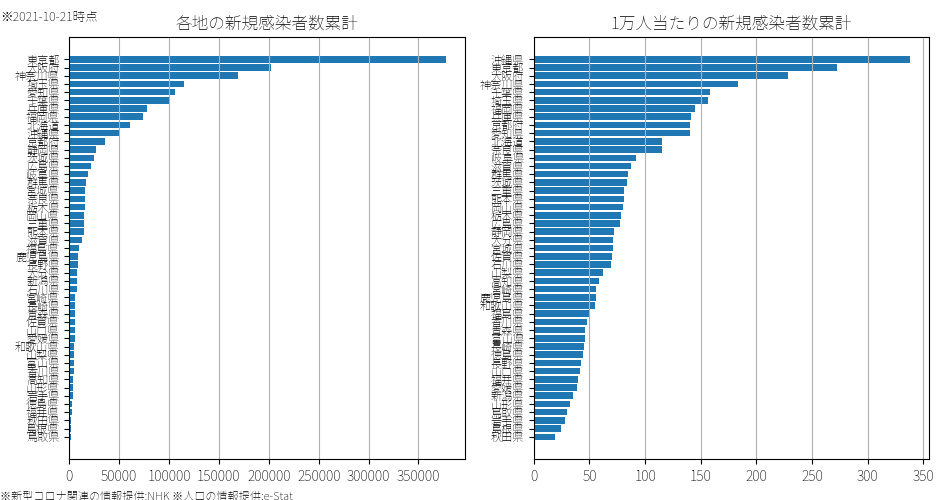

In [21]:
fig = plt.figure(figsize=(9.5,5))
plt.subplot(1,2,1) # (rows, columns, panel number)
plt.title("各地の新規感染者数累計")
plt.yticks(fontsize=8)
plt.grid(axis="x")
chart_data = all_jp.sort_values(["各地の感染者数合計"])
plt.barh(chart_data["都道府県名"],chart_data["各地の感染者数合計"],align="center")

plt.subplot(1,2,2) # (rows, columns, panel number)
plt.title("1万人当たりの新規感染者数累計")
plt.yticks(fontsize=8)
plt.grid(axis="x")
chart_data = all_jp.sort_values(["１万人当たりの感染者数"])
plt.barh(chart_data["都道府県名"], chart_data["１万人当たりの感染者数"])

fig.text(0,0,"※新型コロナ関連の情報提供:NHK ※人口の情報提供:e-Stat",fontsize=8)
fig.text(0,0.98,"※{}時点".format(latest_date),fontsize=9,va="top")

fig.tight_layout()

<IPython.core.display.Javascript object>


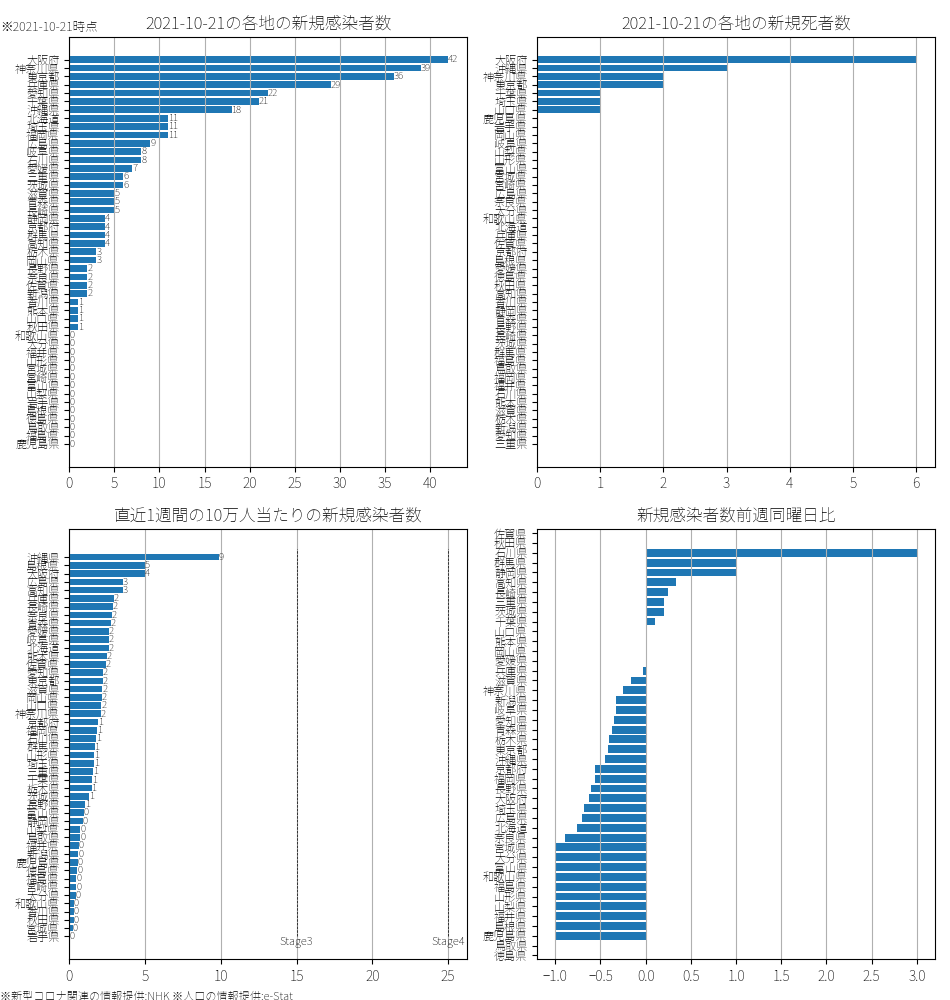

In [22]:
fig = plt.figure(figsize=(9.5,10))

#plt.style.use("ggplot")
### 最新の各地の新規感染者数
plt.subplot(2,2,1) # (rows, columns, panel number)
plt.title("{}の各地の新規感染者数".format(latest_date))
chart_data = all_jp.sort_values(["各地の感染者数_1日ごとの発表数"])
plt.barh(chart_data["都道府県名"], chart_data["各地の感染者数_1日ごとの発表数"])
for i,v in enumerate(chart_data["各地の感染者数_1日ごとの発表数"]):
    plt.text(v,i,"{:,}".format(v),va="center",fontsize=7)
plt.yticks(fontsize=8)
plt.grid(axis="x")

### 最新の各地の死者数
plt.subplot(2,2,2) # (rows, columns, panel number)
plt.title("{}の各地の新規死者数".format(latest_date))
chart_data = all_jp.sort_values(["各地の死者数_1日ごとの発表数"])
plt.barh(chart_data["都道府県名"], chart_data["各地の死者数_1日ごとの発表数"])
plt.yticks(fontsize=8)
plt.grid(axis="x")



### 直近1週間の10万人当たりの新規感染者数
plt.subplot(2,2,3) # (rows, columns, panel number)
plt.title("直近1週間の10万人当たりの新規感染者数")
chart_data = all_jp.sort_values(["直近1週間の10万人当たりの感染者数"])
plt.barh(chart_data["都道府県名"], chart_data["直近1週間の10万人当たりの感染者数"])
for i,v in enumerate(chart_data["直近1週間の10万人当たりの感染者数"]):
    plt.text(v,i,"{:,}".format(int(v)),va="center",fontsize=7)
plt.plot([15,15],[0,47],"--",lw=0.5,color="black")
plt.text(15,0,"Stage3",ha="center",va="top",fontsize=8)
plt.plot([25,25],[0,47],"--",lw=0.5,color="black")
plt.text(25,0,"Stage4",ha="center",va="top",fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis="x")

### 新規感染者数の増加速度（新規感染者数前週同曜日比）
plt.subplot(2,2,4) # (rows, columns, panel number)
plt.title("新規感染者数前週同曜日比")
chart_data = all_jp.sort_values("新規感染者数先週比",na_position="first")
plt.barh(chart_data["都道府県名"], chart_data["新規感染者数先週比"])
plt.yticks(fontsize=8)
plt.grid(axis="x")

fig.text(0,0,"※新型コロナ関連の情報提供:NHK ※人口の情報提供:e-Stat",fontsize=8)
fig.text(0,0.98,"※{}時点".format(latest_date),fontsize=9,va="top")

fig.tight_layout()

In [23]:
fig.savefig("out/covid-domestic.png")

## 度数分布表

In [24]:
import numpy as np
data = np.array(all_jp["各地の感染者数合計"])
 
# ヒストグラム
hist, bin_edges = np.histogram(data, bins=8)

print(hist)
print(bin_edges)

[37  4  3  1  1  0  0  1]
[  1662.     48621.875  95581.75  142541.625 189501.5   236461.375
 283421.25  330381.125 377341.   ]


## ヒストグラム

<IPython.core.display.Javascript object>


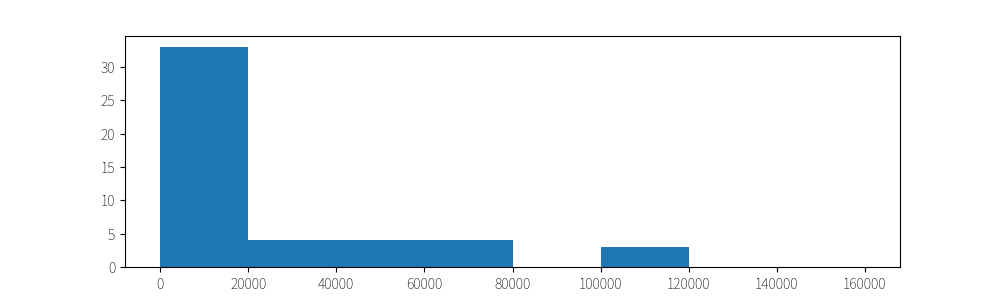

(array([33.,  4.,  4.,  0.,  3.,  0.,  0.]),
 array([     0,  20000,  40000,  80000, 100000, 120000, 140000, 160000]),
 <a list of 7 Patch objects>)

In [25]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["各地の感染者数合計"],bins=[0,20000,40000,80000,100000,120000,140000,160000])

<IPython.core.display.Javascript object>


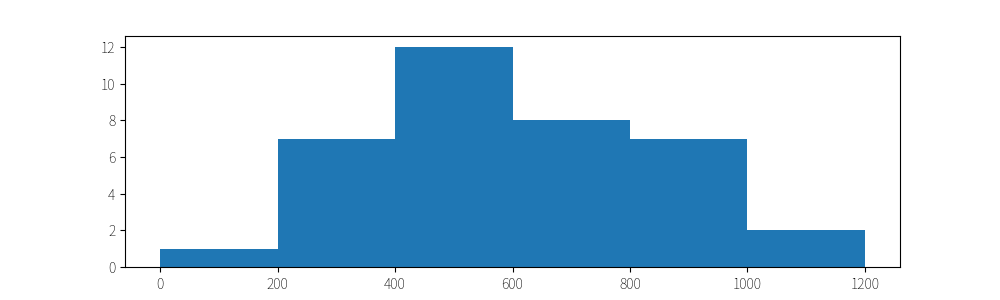

(array([ 1.,  7., 12.,  8.,  7.,  2.]),
 array([   0,  200,  400,  600,  800, 1000, 1200]),
 <a list of 6 Patch objects>)

In [26]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["10万人当たりの感染者数"],bins=[0,200,400,600,800,1000,1200])


In [27]:
pref[pref["都道府県名"]=="山口県"].tail(10)


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,各地の直近1週間の人口10万人あたりの感染者数,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,新規感染者数先週比
22565,2021-10-12,35,山口県,13,5659,0,91,3.24,44.0,12.000000,2.048613,0.857143
22566,2021-10-13,35,山口県,10,5669,0,91,3.90,53.0,-0.230769,2.138095,9.000000
22567,2021-10-14,35,山口県,1,5670,1,92,3.76,51.0,-0.900000,1.723810,-0.666667
22568,2021-10-15,35,山口県,3,5673,0,92,3.24,44.0,2.000000,1.676190,-0.700000
22569,2021-10-16,35,山口県,9,5682,0,92,2.95,40.0,2.000000,1.919048,-0.307692
22570,2021-10-17,35,山口県,5,5687,0,92,3.09,42.0,-0.444444,1.965446,0.666667
22571,2021-10-18,35,山口県,4,5691,0,92,3.31,45.0,-0.200000,2.032112,3.000000
22572,2021-10-19,35,山口県,3,5694,0,92,2.58,35.0,-0.250000,0.282112,-0.769231
22573,2021-10-20,35,山口県,4,5698,0,92,2.14,29.0,0.333333,0.362698,-0.600000
22574,2021-10-21,35,山口県,1,5699,1,93,2.14,29.0,-0.750000,0.384127,0.000000
